In [1]:
# for the old construction site, near plaksha, lets get some Sentinel 2 data and Extract NDVI and RGB for 12 months

In [143]:
import geopandas as gpd
import geemap
import ee

from pystac_client import Client

import stackstac

import matplotlib.pyplot as plt
import numpy as np
import planetary_computer
import rasterio

In [3]:
ee.Authenticate()
ee.Initialize(project="idyllic-catfish-328000")

In [97]:
gdf = gpd.read_file("data/qgis_mynearhouse_construction.shp")

In [144]:
client = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1", modifier=planetary_computer.sign_inplace)

In [145]:
gdf

,id,geometry
0,0,"POLYGON ((77.75061 13.01172, 77.75178 13.01606..."


In [146]:
search = client.search(
    collections=['sentinel-2-l2a'],
    intersects=gdf.geometry.iloc[0].__geo_interface__,
    datetime="2023-01-01/2023-12-31",
)
items = search.item_collection()

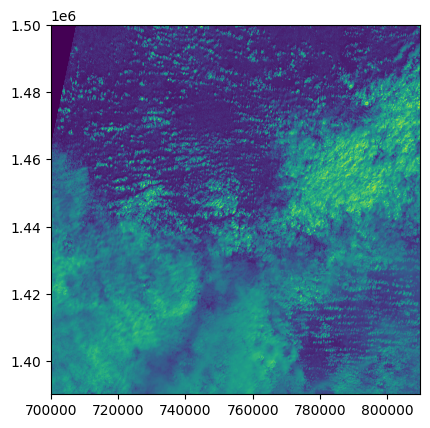

<Axes: >

In [150]:
import rasterio
im = rasterio.open(items[0].assets["B04"].href)

from rasterio.plot import show

# show((im, 1))

In [148]:
stack = stackstac.stack(items, resolution=10, bounds_latlon=gdf.geometry.iloc[0].bounds)

In [149]:
stack

<xarray.DataArray 'stackstac-896befad3dd9a85b223bb379f68dea49' (time: 73,
                                                                band: 17,
                                                                y: 98, x: 67)> Size: 65MB
dask.array<fetch_raster_window, shape=(73, 17, 98, 67), dtype=float64, chunksize=(1, 1, 98, 67), chunktype=numpy.ndarray>
Coordinates: (12/46)
  * time                                     (time) datetime64[ns] 584B 2023-...
    id                                       (time) <U54 16kB 'S2A_MSIL2A_202...
  * band                                     (band) <U7 476B 'AOT' ... 'preview'
  * x                                        (x) float64 536B 7.984e+05 ... 7...
  * y                                        (y) float64 784B 1.441e+06 ... 1...
    s2:high_proba_clouds_percentage          (time) float64 584B 9.902 ... 64.42
    ...                                       ...
    proj:shape                               (band) object 136B [10980, 10980...
    proj:bbox                                (band) object 136B [699960.0, 13...
    common_name                              (band) object 136B None ... None
    center_wavelength                        (band) object 136B None ... None
    full_width_half_max                      (band) object 136B None ... None
    epsg                                     int64 8B 32643
Attributes:
    spec:        RasterSpec(epsg=32643, bounds=(798360, 1439740, 799030, 1440...
    crs:         epsg:32643
    transform:   | 10.00, 0.00, 798360.00|\n| 0.00,-10.00, 1440720.00|\n| 0.0...
    resolution:  10

In [122]:
import rasterio

In [130]:
np.unique(np.isnan(stack.isel(time=-1).sel(band="B02").data.compute()),return_counts=True)

(array([ True]), array([6566]))

In [119]:
stack.indexes["time"].values

array(['2023-01-03T05:12:21.024000000', '2023-01-08T05:12:09.024000000',
       '2023-01-13T05:11:51.024000000', '2023-01-18T05:11:39.024000000',
       '2023-01-23T05:11:11.024000000', '2023-01-28T05:10:49.024000000',
       '2023-02-02T05:10:31.024000000', '2023-02-07T05:09:59.024000000',
       '2023-02-12T05:09:31.024000000', '2023-02-17T05:08:59.024000000',
       '2023-02-22T05:08:21.024000000', '2023-03-04T05:07:11.024000000',
       '2023-03-04T05:07:11.024000000', '2023-03-09T05:06:59.025000000',
       '2023-03-09T05:06:59.025000000', '2023-03-14T05:06:51.024000000',
       '2023-03-14T05:06:51.024000000', '2023-03-19T05:06:59.024000000',
       '2023-03-24T05:06:51.024000000', '2023-03-29T05:06:59.024000000',
       '2023-04-03T05:06:51.024000000', '2023-04-08T05:06:59.024000000',
       '2023-04-13T05:06:51.024000000', '2023-04-18T05:06:59.024000000',
       '2023-04-23T05:06:51.024000000', '2023-04-28T05:06:59.024000000',
       '2023-05-08T05:06:59.024000000', '2023-05-13

In [121]:
rgb = stack.sel(band=["B02"])

for dt_val in stack.indexes["time"].values:
    data = rgb.sel(time=dt_val).values
    print(np.unique(data, return_counts=True))

(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([13132]))
(array([nan]), array([13132]))
(array([nan]), array([13132]))
(array([nan]), array([13132]))
(array([nan]), array([13132]))
(array([nan]), array([13132]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(array([nan]), array([6566]))
(arr